<a href="https://colab.research.google.com/github/jessifebria/COVID19-approval-req-system-SPRINGBOOT/blob/master/RockPaperScissors_JessiFebria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

train_dir= os.path.join("/content/drive/My Drive/rockpaperscissors/train")
val_dir=os.path.join("/content/drive/My Drive/rockpaperscissors/val")

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=4,
        class_mode="categorical")
 
val_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=4, 
        class_mode='categorical')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n
STEP_SIZE_VALID=val_generator.n

model.fit_generator(generator=train_generator,
                    steps_per_epoch=175,
                    validation_data=val_generator,
                    validation_steps=70,
                    epochs=10
)

model.evaluate_generator(generator=val_generator,
steps=STEP_SIZE_VALID)


Found 2049 images belonging to 3 classes.
Found 139 images belonging to 3 classes.
Epoch 1/10
175/175 [==============================] - 43s 247ms/step - loss: 1.1036 - accuracy: 0.3443 - val_loss: 1.0869 - val_accuracy: 0.6151
Epoch 2/10
175/175 [==============================] - 43s 248ms/step - loss: 0.6397 - accuracy: 0.7600 - val_loss: 0.3832 - val_accuracy: 0.8669
Epoch 3/10
175/175 [==============================] - 43s 248ms/step - loss: 0.3237 - accuracy: 0.9053 - val_loss: 0.2720 - val_accuracy: 0.9029
Epoch 4/10
175/175 [==============================] - 43s 248ms/step - loss: 0.2416 - accuracy: 0.9243 - val_loss: 0.1897 - val_accuracy: 0.9353
Epoch 5/10
175/175 [==============================] - 43s 246ms/step - loss: 0.1963 - accuracy: 0.9271 - val_loss: 0.3322 - val_accuracy: 0.8453
Epoch 6/10
175/175 [==============================] - 43s 245ms/step - loss: 0.2267 - accuracy: 0.9225 - val_loss: 0.1896 - val_accuracy: 0.9460
Epoch 7/10
175/175 [===========================

[0.11233215034008026, 0.9547101259231567]

Saving 1Frbe8cdOdkciOBg.png to 1Frbe8cdOdkciOBg.png
Paper


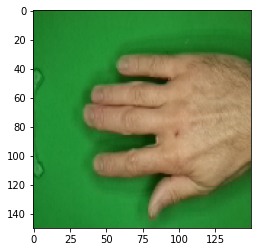

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string

uploaded = files.upload()
for fn in uploaded.keys():
	 
  
	  path = fn
	  img = image.load_img(path, target_size=(150,150))
	  imgplot = plt.imshow(img)
	  x = image.img_to_array(img)
	  x = np.expand_dims(x, axis=0)
	 
	  images = np.vstack([x])
	  classes = model.predict(images, batch_size=10)
	 
hasil= classes[0].tolist()
if hasil[0]==1.0:
  print("Paper")
elif hasil[1]==1.0:
  print("Rock")
elif hasil[2]==1.0:
  print("Scisscors")
else:
  print("Unknown Object")
